Nama: Riofebri Prasetia
NIM: 221911192
Kelas: 3SI1
Mata Kuliah: Data Mining Knowledge Managament
Hackaton

# **Prepare**

In [1]:
# import data from kagle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"riofebriprasetia","key":"4fde1e04d0dd446b1e8e0955192fff6b"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 72 Nov 14 06:14 kaggle.json


In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15500  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9424  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4218  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3440  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [5]:
!kaggle competitions download -c testing-competition-stis

Train.csv: Skipping, found more recently modified local copy (use --force to force download)
Solution%20Sample.csv: Skipping, found more recently modified local copy (use --force to force download)
Test.csv: Skipping, found more recently modified local copy (use --force to force download)


# **Library yang digunakan dan import data**

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import neighbors

**Load Data**

Data yang digunakan adalah data Status Kelengkapan Imunisasi

In [7]:
#Import data test train dan test

df_test = pd.read_csv('Test.csv')
df_train = pd.read_csv('Train.csv')

In [47]:
df_test2 = pd.read_csv('Test.csv')

In [8]:
#cek tabel train
df_train

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,1,11,1101,0,1,27,0,0,1,1,1.077,15.075,26.919,390.869
1,2,11,1101,0,1,38,0,0,1,0,1.077,15.075,26.919,390.869
2,4,11,1101,0,0,36,0,0,0,1,1.077,15.075,26.919,390.869
3,7,11,1101,0,0,27,0,0,1,1,1.077,15.075,26.919,390.869
4,8,11,1101,0,1,36,1,0,0,0,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,19524,94,9471,1,0,28,1,0,1,1,1.757,3.262,48.936,209.045
13622,19526,94,9471,0,1,22,1,1,1,1,1.757,3.262,48.936,209.045
13623,19527,94,9471,0,0,35,1,0,1,1,1.757,3.262,48.936,209.045
13624,19529,94,9471,0,0,27,1,0,1,1,1.757,3.262,48.936,209.045


In [9]:
#cek tabel test
df_test

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,3,11,1101,1,39,0,0,1,1,1.077,15.075,26.919,390.869
1,5,11,1101,0,32,1,0,1,1,1.077,15.075,26.919,390.869
2,6,11,1101,1,32,1,0,1,1,1.077,15.075,26.919,390.869
3,10,11,1101,1,28,1,0,1,0,1.077,15.075,26.919,390.869
4,17,11,1101,0,31,1,0,1,1,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901,19515,94,9471,1,39,0,1,1,1,1.757,3.262,48.936,209.045
5902,19525,94,9471,0,30,1,1,1,1,1.757,3.262,48.936,209.045
5903,19528,94,9471,0,22,1,1,1,1,1.757,3.262,48.936,209.045
5904,19531,94,9471,0,40,1,1,1,1,1.757,3.262,48.936,209.045


Lihat info tabel dataset nya terlebih dahulu

In [10]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13626 entries, 0 to 13625
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          13626 non-null  int64  
 1   Provinsi    13626 non-null  int64  
 2   KodeKabKot  13626 non-null  int64  
 3   Y           13626 non-null  int64  
 4   X1          13626 non-null  int64  
 5   X2          13626 non-null  int64  
 6   X3          13626 non-null  int64  
 7   X4          13626 non-null  int64  
 8   X5          13626 non-null  int64  
 9   X6          13626 non-null  int64  
 10  Z1          13626 non-null  float64
 11  Z2          13626 non-null  float64
 12  Z3          13626 non-null  float64
 13  Z4          13621 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906 entries, 0 to 5905
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ---

# **Lakukan Preprocesing**

In [11]:
#untuk data train
# dapatkan beberapa informasi tiap baris
print(df_train)

# describe the data
df_train.describe()

          ID  Provinsi  KodeKabKot  Y  X1  ...  X6     Z1      Z2      Z3       Z4
0          1        11        1101  0   1  ...   1  1.077  15.075  26.919  390.869
1          2        11        1101  0   1  ...   0  1.077  15.075  26.919  390.869
2          4        11        1101  0   0  ...   1  1.077  15.075  26.919  390.869
3          7        11        1101  0   0  ...   1  1.077  15.075  26.919  390.869
4          8        11        1101  0   1  ...   0  1.077  15.075  26.919  390.869
...      ...       ...         ... ..  ..  ...  ..    ...     ...     ...      ...
13621  19524        94        9471  1   0  ...   1  1.757   3.262  48.936  209.045
13622  19526        94        9471  0   1  ...   1  1.757   3.262  48.936  209.045
13623  19527        94        9471  0   0  ...   1  1.757   3.262  48.936  209.045
13624  19529        94        9471  0   0  ...   1  1.757   3.262  48.936  209.045
13625  19530        94        9471  1   0  ...   1  1.757   3.262  48.936  209.045

[13

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
count,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13621.000000
mean,9763.218406,44.562601,4477.179363,0.409511,0.610744,30.380229,0.487817,0.401805,0.813518,0.875899,1.227538,6.876482,35.597681,197.945368
std,5654.343886,26.377273,2633.993903,0.491762,0.487599,6.357110,0.499870,0.490281,0.389509,0.329709,1.059310,5.638141,33.103822,137.404420
min,1.000000,11.000000,1101.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369000,0.861000,20.183000
25%,4866.500000,18.000000,1804.000000,0.000000,0.000000,26.000000,0.000000,0.000000,1.000000,1.000000,0.564000,3.183000,16.744000,102.438000
50%,9773.500000,35.000000,3523.000000,0.000000,1.000000,30.000000,0.000000,0.000000,1.000000,1.000000,0.908000,4.965000,25.896000,163.192000
75%,14651.750000,71.000000,7171.000000,1.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.473000,8.334000,39.854000,257.738000
max,19530.000000,94.000000,9471.000000,1.000000,1.000000,54.000000,1.000000,1.000000,1.000000,1.000000,6.960000,35.237000,291.322000,1400.875000


In [12]:
#untuk data test
# dapatkan beberapa informasi tiap baris
print(df_test)

# describe the data
df_test.describe()

         ID  Provinsi  KodeKabKot  X1  X2  ...  X6     Z1      Z2      Z3       Z4
0         3        11        1101   1  39  ...   1  1.077  15.075  26.919  390.869
1         5        11        1101   0  32  ...   1  1.077  15.075  26.919  390.869
2         6        11        1101   1  32  ...   1  1.077  15.075  26.919  390.869
3        10        11        1101   1  28  ...   0  1.077  15.075  26.919  390.869
4        17        11        1101   0  31  ...   1  1.077  15.075  26.919  390.869
...     ...       ...         ...  ..  ..  ...  ..    ...     ...     ...      ...
5901  19515        94        9471   1  39  ...   1  1.757   3.262  48.936  209.045
5902  19525        94        9471   0  30  ...   1  1.757   3.262  48.936  209.045
5903  19528        94        9471   0  22  ...   1  1.757   3.262  48.936  209.045
5904  19531        94        9471   0  40  ...   1  1.757   3.262  48.936  209.045
5905  19532        94        9471   0  38  ...   1  1.757   3.262  48.936  209.045

[59

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
count,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5901.000000
mean,9774.071114,44.540298,4474.883678,0.599221,30.622079,0.497630,0.418049,0.827972,0.872164,1.206896,6.791408,35.871193,195.885574
std,5602.401244,26.055399,2602.043360,0.490098,6.552239,0.500037,0.493280,0.377437,0.333935,1.014191,5.602126,34.409927,130.892617
min,3.000000,11.000000,1101.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369000,0.861000,20.183000
25%,4927.250000,18.000000,1805.000000,0.000000,26.000000,0.000000,0.000000,1.000000,1.000000,0.550000,3.136000,16.744000,104.301000
50%,9734.500000,35.000000,3522.000000,1.000000,30.000000,0.000000,0.000000,1.000000,1.000000,0.883000,4.925500,25.318000,159.925000
75%,14639.000000,71.000000,7111.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.473000,8.134000,39.434000,257.738000
max,19532.000000,94.000000,9471.000000,1.000000,54.000000,1.000000,1.000000,1.000000,1.000000,6.960000,35.237000,291.322000,1400.875000


Cek apakah ada baris yang mengandung null?

In [13]:
#ubah data NaN jadi np.nan
df_train = df_train.replace('NaN', np.nan)

df_train.isna().sum()

ID            0
Provinsi      0
KodeKabKot    0
Y             0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
Z1            0
Z2            0
Z3            0
Z4            5
dtype: int64

In [14]:
#ubah data NaN jadi np.nan
df_test = df_test.replace('NaN', np.nan)

df_test.isna().sum()

ID            0
Provinsi      0
KodeKabKot    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
Z1            0
Z2            0
Z3            0
Z4            5
dtype: int64

In [15]:
df_train.fillna(df_train.median(), inplace=True)
df_train.isna().sum()

ID            0
Provinsi      0
KodeKabKot    0
Y             0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
Z1            0
Z2            0
Z3            0
Z4            0
dtype: int64

In [16]:
df_test.fillna(df_test.median(), inplace=True)
df_test.isna().sum()

ID            0
Provinsi      0
KodeKabKot    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
Z1            0
Z2            0
Z3            0
Z4            0
dtype: int64

Untuk Metode K-NearestNeighbor dalam mengatasi nilai null yaitu dengan cara dilakukan imputasi dengan cara isi nilai null dengan nilai median pada kolom yang mengandung null

In [17]:
data_train = pd.DataFrame(df_train)
data_test = pd.DataFrame(df_test)

tabel menjadi dataframe

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in data_train.columns:
  data_train[x] = le.fit_transform(data_train[x])

data_train.head(10)

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,0,0,0,0,1,13,0,0,1,1,248,458,257,471
1,1,0,0,0,1,24,0,0,1,0,248,458,257,471
2,2,0,0,0,0,22,0,0,0,1,248,458,257,471
3,3,0,0,0,0,13,0,0,1,1,248,458,257,471
4,4,0,0,0,1,22,1,0,0,0,248,458,257,471
5,5,0,0,1,1,6,0,1,1,0,248,458,257,471
6,6,0,0,0,1,13,0,1,1,1,248,458,257,471
7,7,0,0,0,0,22,1,0,1,1,248,458,257,471
8,8,0,0,0,0,19,1,0,1,1,248,458,257,471
9,9,0,0,0,1,9,1,0,1,1,248,458,257,471


In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in data_test.columns:
  data_test[x] = le.fit_transform(data_test[x])

data_test.head(10)

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,0,0,0,1,24,0,0,1,1,248,458,257,471
1,1,0,0,0,17,1,0,1,1,248,458,257,471
2,2,0,0,1,17,1,0,1,1,248,458,257,471
3,3,0,0,1,13,1,0,1,0,248,458,257,471
4,4,0,0,0,16,1,0,1,1,248,458,257,471
5,5,0,0,1,9,0,0,1,1,248,458,257,471
6,6,0,0,1,12,1,0,1,1,248,458,257,471
7,7,0,0,1,10,1,0,1,1,248,458,257,471
8,8,0,1,1,19,0,1,1,1,180,392,328,388
9,9,0,1,0,5,0,0,0,1,180,392,328,388


Melakukan pengkodean value untuk dilakukan standarisasi

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data_train = pd.DataFrame(scaler.fit_transform(data_train))

std_data_train.columns = data_train.columns
std_data_train

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,-1.731924,-1.512035,-1.705730,-0.832774,0.798340,-0.531744,-0.975925,-0.819571,0.478778,0.376410,0.301923,1.488305,0.059337,1.522778
1,-1.731669,-1.512035,-1.705730,-0.832774,0.798340,1.198666,-0.975925,-0.819571,0.478778,-2.656681,0.301923,1.488305,0.059337,1.522778
2,-1.731415,-1.512035,-1.705730,-0.832774,-1.252599,0.884046,-0.975925,-0.819571,-2.088649,0.376410,0.301923,1.488305,0.059337,1.522778
3,-1.731161,-1.512035,-1.705730,-0.832774,-1.252599,-0.531744,-0.975925,-0.819571,0.478778,0.376410,0.301923,1.488305,0.059337,1.522778
4,-1.730907,-1.512035,-1.705730,-0.832774,0.798340,0.884046,1.024669,-0.819571,-2.088649,-2.656681,0.301923,1.488305,0.059337,1.522778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,1.730907,1.765075,1.779186,1.200806,-1.252599,-0.374434,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.394056
13622,1.731161,1.765075,1.779186,-0.832774,0.798340,-1.318293,1.024669,1.220150,0.478778,0.376410,1.046703,-0.850424,1.098507,0.394056
13623,1.731415,1.765075,1.779186,-0.832774,-1.252599,0.726736,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.394056
13624,1.731669,1.765075,1.779186,-0.832774,-1.252599,-0.531744,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.394056


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data_test = pd.DataFrame(scaler.fit_transform(data_test))

std_data_test.columns = data_test.columns
std_data_test

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,-1.731758,-1.529574,-1.722969,0.817822,1.278743,-0.995270,-0.847561,0.455819,0.382849,0.315921,1.504190,0.064364,1.545109
1,-1.731171,-1.529574,-1.722969,-1.222760,0.210316,1.004752,-0.847561,0.455819,0.382849,0.315921,1.504190,0.064364,1.545109
2,-1.730584,-1.529574,-1.722969,0.817822,0.210316,1.004752,-0.847561,0.455819,0.382849,0.315921,1.504190,0.064364,1.545109
3,-1.729998,-1.529574,-1.722969,0.817822,-0.400215,1.004752,-0.847561,0.455819,-2.611995,0.315921,1.504190,0.064364,1.545109
4,-1.729411,-1.529574,-1.722969,-1.222760,0.057683,1.004752,-0.847561,0.455819,0.382849,0.315921,1.504190,0.064364,1.545109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901,1.729411,1.784316,1.793939,0.817822,1.278743,-0.995270,1.179857,0.455819,0.382849,1.060210,-0.829648,1.104288,0.400073
5902,1.729998,1.784316,1.793939,-1.222760,-0.094950,1.004752,1.179857,0.455819,0.382849,1.060210,-0.829648,1.104288,0.400073
5903,1.730584,1.784316,1.793939,-1.222760,-1.316010,1.004752,1.179857,0.455819,0.382849,1.060210,-0.829648,1.104288,0.400073
5904,1.731171,1.784316,1.793939,-1.222760,1.431376,1.004752,1.179857,0.455819,0.382849,1.060210,-0.829648,1.104288,0.400073


Melakukan Standarisasi/normalisasi data

In [22]:
std_data_train['Y'] = le.fit_transform(std_data_train['Y'])
std_data_train

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,-1.731924,-1.512035,-1.705730,0,0.798340,-0.531744,-0.975925,-0.819571,0.478778,0.376410,0.301923,1.488305,0.059337,1.522778
1,-1.731669,-1.512035,-1.705730,0,0.798340,1.198666,-0.975925,-0.819571,0.478778,-2.656681,0.301923,1.488305,0.059337,1.522778
2,-1.731415,-1.512035,-1.705730,0,-1.252599,0.884046,-0.975925,-0.819571,-2.088649,0.376410,0.301923,1.488305,0.059337,1.522778
3,-1.731161,-1.512035,-1.705730,0,-1.252599,-0.531744,-0.975925,-0.819571,0.478778,0.376410,0.301923,1.488305,0.059337,1.522778
4,-1.730907,-1.512035,-1.705730,0,0.798340,0.884046,1.024669,-0.819571,-2.088649,-2.656681,0.301923,1.488305,0.059337,1.522778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,1.730907,1.765075,1.779186,1,-1.252599,-0.374434,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.394056
13622,1.731161,1.765075,1.779186,0,0.798340,-1.318293,1.024669,1.220150,0.478778,0.376410,1.046703,-0.850424,1.098507,0.394056
13623,1.731415,1.765075,1.779186,0,-1.252599,0.726736,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.394056
13624,1.731669,1.765075,1.779186,0,-1.252599,-0.531744,1.024669,-0.819571,0.478778,0.376410,1.046703,-0.850424,1.098507,0.394056


Ubah nilai pada Atribut Y menjadi 0 dan 1 dimana 1 ialah status imunisasi lengkap dan 0 status imunisasi tidak lengkap

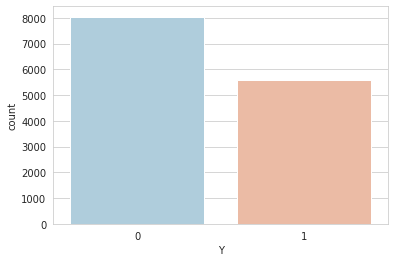

In [23]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x=data_train['Y'],data=data_train,palette='RdBu_r')

**cek imbalance**
data masih mendekati balance

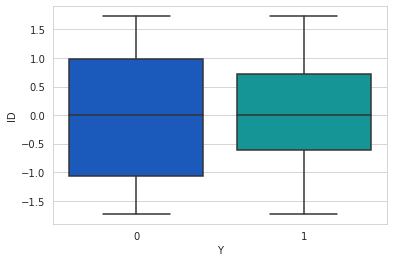

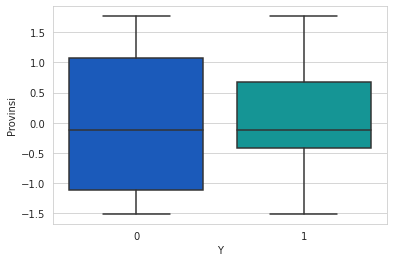

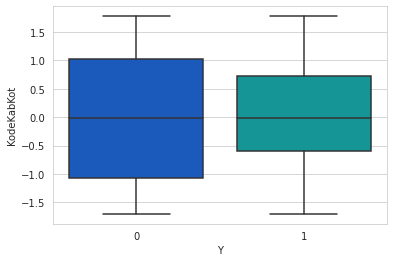

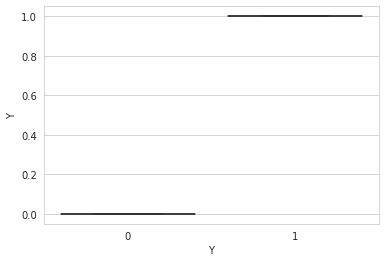

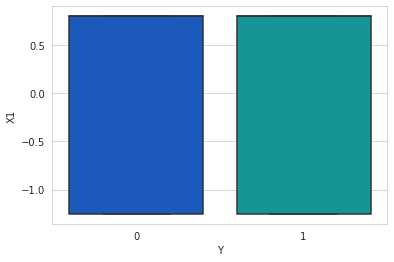

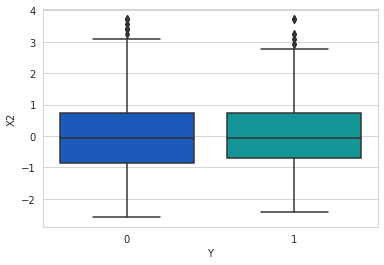

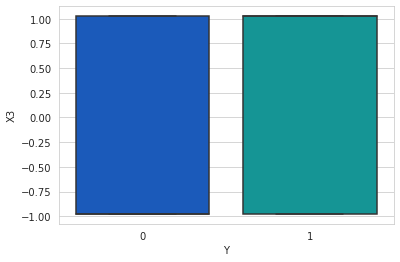

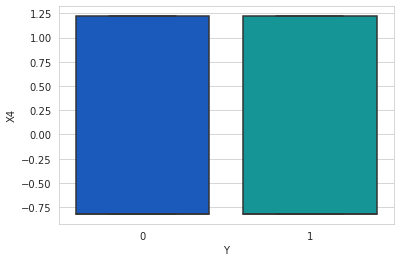

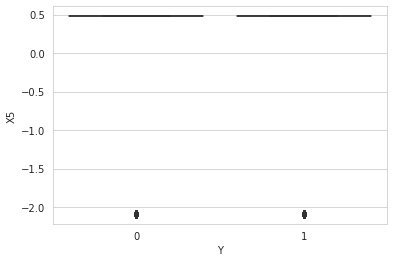

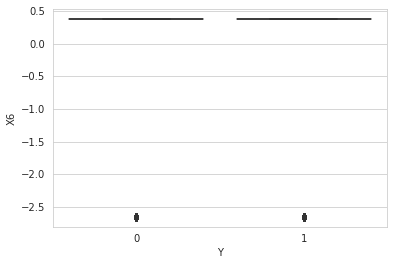

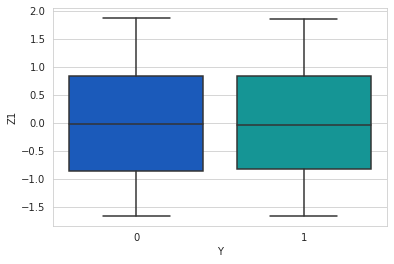

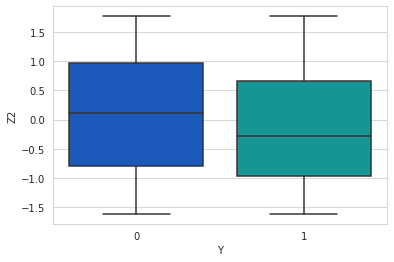

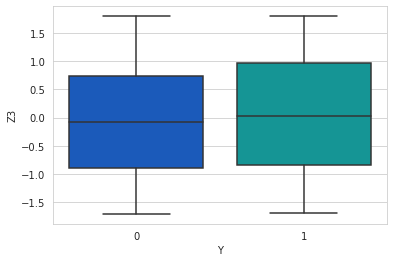

<Figure size 432x288 with 0 Axes>

In [24]:
l=list(std_data_train.columns[0:14])
for i in range(len(l)-1):
    sns.boxplot(x='Y',y=l[i], data=std_data_train, palette='winter')
    plt.figure()

In [25]:
std_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13626 entries, 0 to 13625
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          13626 non-null  float64
 1   Provinsi    13626 non-null  float64
 2   KodeKabKot  13626 non-null  float64
 3   Y           13626 non-null  int64  
 4   X1          13626 non-null  float64
 5   X2          13626 non-null  float64
 6   X3          13626 non-null  float64
 7   X4          13626 non-null  float64
 8   X5          13626 non-null  float64
 9   X6          13626 non-null  float64
 10  Z1          13626 non-null  float64
 11  Z2          13626 non-null  float64
 12  Z3          13626 non-null  float64
 13  Z4          13626 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.5 MB


Text(0.5, 1.0, 'Dengan Z3')

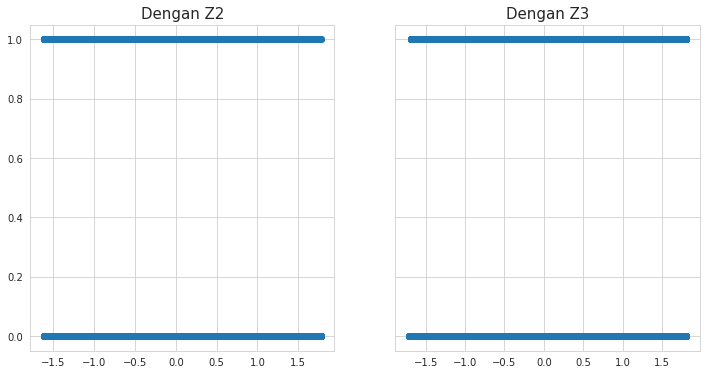

In [26]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(std_data_train['Z2'],std_data_train['Y'])
ax1.set_title("Dengan Z2", fontsize=15)
ax2.scatter(std_data_train['Z3'],std_data_train['Y'])
ax2.set_title("Dengan Z3", fontsize=15)

Text(0.5, 1.0, 'Status imunisasi tidak lengkap')

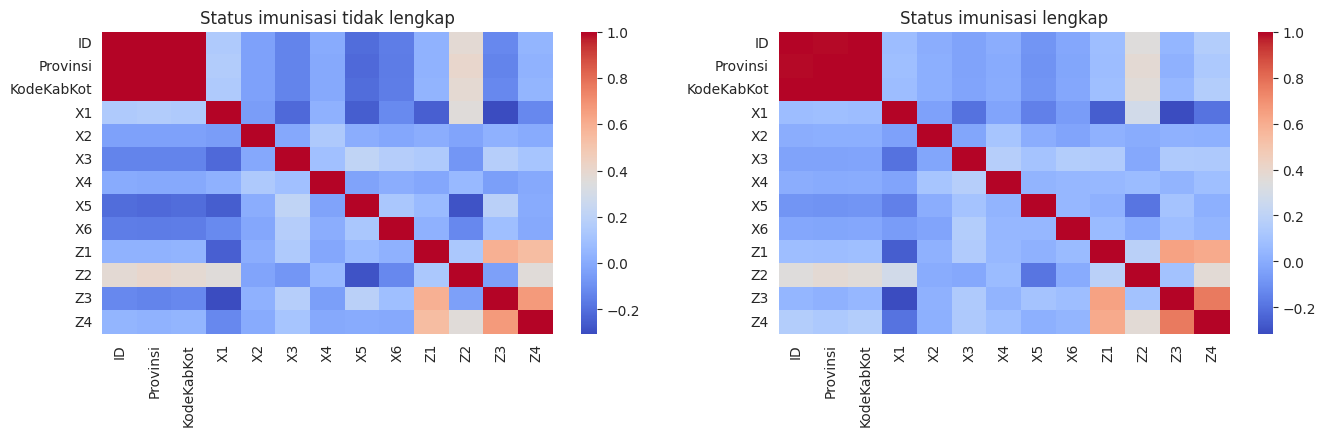

In [27]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(std_data_train[std_data_train['Y']==1][["ID", "Provinsi", "KodeKabKot", "X1", "X2", "X3", "X4", "X5", "X6", "Z1", "Z2", "Z3", "Z4"]].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Status imunisasi lengkap')
ax = sns.heatmap(std_data_train[std_data_train['Y']==0][["ID", "Provinsi", "KodeKabKot", "X1", "X2", "X3", "X4", "X5", "X6", "Z1", "Z2", "Z3", "Z4"]].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Status imunisasi tidak lengkap')

Split Data

In [28]:
from sklearn import model_selection

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(std_data_train.drop(columns=['Y']), std_data_train[['Y']], test_size=0.33, random_state=69)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

#X_train = std_data.drop(std_data.columns[0], axis=1)
#y_train = std_data.drop(std_data.columns[1:11], axis=1)
#X_test = std_data_test

Jumlah Training Data :  9129  | Jumlah Test Data :  4497


# Membangun Model

In [30]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)

print(X_train)
print(y_train)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

# print(metrics.confusion_matrix(y_test, predicted))
# print(metrics.accuracy_score(y_test, predicted))

             ID  Provinsi  KodeKabKot  ...        Z2        Z3        Z4
2763  -1.029494 -1.015503   -1.026409  ... -0.687730 -0.511862 -0.254790
8211   0.355537  0.275479    0.318646  ...  1.345948  0.554835  1.272702
10275  0.880262  0.871318    0.902862  ... -0.504699  1.132916  1.610643
13348  1.661503  1.765075    1.663701  ...  1.617105 -1.626733 -1.363236
4792  -0.513666 -0.419665   -0.523712  ... -1.419854  1.057215 -0.349414
...         ...       ...         ...  ...       ...       ...       ...
8631   0.462312  0.275479    0.420544  ... -1.230044  1.635296  1.367325
9818   0.764080  0.672705    0.760205  ... -0.911435  1.621533  1.164561
10859  1.028731  1.069930    1.052313  ...  0.451129  0.871404 -1.221301
4041  -0.704591 -0.618278   -0.673162  ... -1.521538  1.050333  0.015562
7371   0.141986 -0.022440    0.121643  ... -1.487643  1.607769  0.184533

[9129 rows x 13 columns]
       Y
2763   0
8211   0
10275  0
13348  1
4792   0
...   ..
8631   0
9818   0
10859  0
4041   0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[0 0 0 ... 0 0 1]


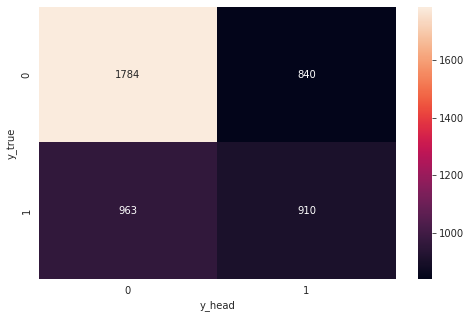

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      2624
           1       0.52      0.49      0.50      1873

    accuracy                           0.60      4497
   macro avg       0.58      0.58      0.58      4497
weighted avg       0.60      0.60      0.60      4497



# Melakukan Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[0.59748083 0.59638554 0.59638554 0.61883899 0.59561644]
cv_scores mean:0.6009414694894147


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [34]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters to tune
n_neighbors = list(range(1,100))
p = [1,2]
weights = ['uniform', 'distance']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

#Making model
clf = GridSearchCV(model, hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)

#Best Hyperparameters Value
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

#Predict testing set
predicted2 = best_model.predict(X_test)

#Check performance using accuracy
print(accuracy_score(y_test, predicted2))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataC

Best p: 1
Best n_neighbors: 48
Best weights: uniform
0.6308650211251946


In [35]:
best_model.score(X_test, y_test)

0.6308650211251946

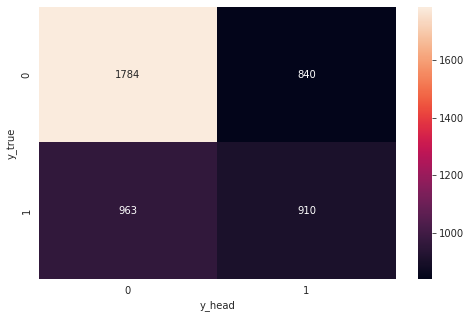

In [36]:
predicted3 = best_model.predict(X_test)

cm = confusion_matrix(y_test, predicted3, labels=best_model.classes_)

import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

# Evaluasi
Menggunakan data test.csv yang sudah di procesing untuk melakukan prediksi

In [49]:
predicted2 = best_model.predict(std_data_test)
predicted2

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
df = pd.DataFrame(predicted2, columns = ['Y'])

In [51]:
df = pd.concat([df_test2["ID"], df], axis=1)
df

,ID,Y
0,3,0
1,5,0
2,6,0
3,10,0
4,17,0
...,...,...
5901,19515,0
5902,19525,1
5903,19528,1
5904,19531,0


In [52]:
df.to_csv("hasil.csv",index=False)